<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment
    
    Question 2
</font>
<br/>		
<font size=4>
<br/>
</div>

# Personal Data

In [1]:
# Set your student number
student_number = 99105901
Name = 'Amirhossein'
Last_Name = 'Akbari'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- In this question, you are allowed to use `torch.optim`, `torch.nn` or any other submodule you need.
- You **are not allowed** to use the models already implemented or the pretrained models in torch. 

In [2]:
# !pip install numpy
# !pip install matplotlib
# !pip install torchvision
# !pip install torch

## Importing Libraries

In [3]:
import torch
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

You should load the train and test set of the `CIFAR10` dataset and apply the desired transforms on it. Then, you should create the loaders for these `test` and `train` sets.
- **Hint:** You can use `torchvision.datasets` to easily load the CIFAR10 dataset.

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_set = CIFAR10(root='.', train=True, download=True, transform=transform)
test_set = CIFAR10(root='.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


## Visualization

Visualize 1 random image from each class


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

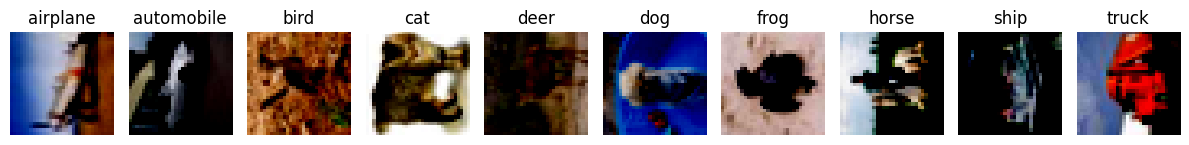

In [5]:
num_classes = len(train_set.classes)
fig, axes = plt.subplots(1, num_classes, figsize=(12, 3))


for class_idx in range(num_classes):

    indices = np.where(np.array(train_set.targets) == class_idx)[0]
    random_index = np.random.choice(indices)

    image, label = train_set[random_index]
    image = image.permute(2,1,0).numpy().squeeze()

    axes[class_idx].imshow(image, cmap='gray')
    axes[class_idx].set_title(train_set.classes[label])
    axes[class_idx].axis('off')

plt.tight_layout()
plt.show()

## Defining a Convolutional Neural Network

In this section, you should define a class called `Net` which represents the model for your convolutional neural network.
- **Hint:** You can use `torch.nn` to add the required layers to your model.

In [6]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define the layers of your network
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.3)


        self.conv2 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2,2))
        self.flat = nn.Flatten()

        self.fc3 = nn.Linear(8192, 512)
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(0.5)

        self.fc4 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.act1(self.conv1(x))
        x = self.drop1(x)
        x = self.act2(self.conv2(x))
        x = self.pool2(x)
        x = self.flat(x)
        x = self.act3(self.fc3(x))
        x = self.drop3(x)
        x = self.fc4(x)
        return x

net = Net()


## Define a Loss function and optimizer

In this section, you simply define your loss function and optimizer.
- **Hint:** You can use `torch.optim` and implemented loss functions in torch.

In [7]:
import torch.optim as optim

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.002, momentum=0.9)


## Training the model

You should train your model for multiple epochs. You are free to choose the number of epochs. However, you should reach an acceptable accuracy at the end.

In [9]:
epoch_nums = 25  # Number of epochs

for epoch in range(epoch_nums):  
    running_loss = 0.0
    i = 1
    for inputs, labels in train_loader:

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epoch_nums}], Batch [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")
        i += 1
        
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epoch_nums}], Average Loss: {avg_loss:.4f}")

print('Finished Training')


Epoch [1/25], Batch [2/782], Loss: 2.3119
Epoch [1/25], Batch [3/782], Loss: 2.2932
Epoch [1/25], Batch [4/782], Loss: 2.3030
Epoch [1/25], Batch [5/782], Loss: 2.2900
Epoch [1/25], Batch [6/782], Loss: 2.2971
Epoch [1/25], Batch [7/782], Loss: 2.2959
Epoch [1/25], Batch [8/782], Loss: 2.3145
Epoch [1/25], Batch [9/782], Loss: 2.2983
Epoch [1/25], Batch [10/782], Loss: 2.3081
Epoch [1/25], Batch [11/782], Loss: 2.2987
Epoch [1/25], Batch [12/782], Loss: 2.2984
Epoch [1/25], Batch [13/782], Loss: 2.2893
Epoch [1/25], Batch [14/782], Loss: 2.3080
Epoch [1/25], Batch [15/782], Loss: 2.2806
Epoch [1/25], Batch [16/782], Loss: 2.2923
Epoch [1/25], Batch [17/782], Loss: 2.2967
Epoch [1/25], Batch [18/782], Loss: 2.3072
Epoch [1/25], Batch [19/782], Loss: 2.2895
Epoch [1/25], Batch [20/782], Loss: 2.2911
Epoch [1/25], Batch [21/782], Loss: 2.2932
Epoch [1/25], Batch [22/782], Loss: 2.2869
Epoch [1/25], Batch [23/782], Loss: 2.2917
Epoch [1/25], Batch [24/782], Loss: 2.2952
Epoch [1/25], Batch

## Test the network on the test data

In the following section, you should test your network and calculate the accuracy of your model on the test dataset.

In [10]:
correct = 0
total = 0

net.eval()
with torch.no_grad():
    for data in test_loader:

        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)

        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

print(f'Accuracy of the network on the {total} test images: {accuracy:.2f}%')


Accuracy of the network on the 10000 test images: 70.75%


Here, we also calculate the model performance for each class as well.

In [11]:
# Prepare to count predictions for each class
classes = train_set.classes
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Again, no gradients needed
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        # Update counts for each class
        for label, prediction in zip(labels, predicted):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f}%')

Accuracy for class: airplane is 75.5%
Accuracy for class: automobile is 82.2%
Accuracy for class: bird  is 59.2%
Accuracy for class: cat   is 50.0%
Accuracy for class: deer  is 63.3%
Accuracy for class: dog   is 61.0%
Accuracy for class: frog  is 81.2%
Accuracy for class: horse is 78.8%
Accuracy for class: ship  is 80.7%
Accuracy for class: truck is 75.6%
